In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm

In [5]:
cd

C:\Users\melvi


In [6]:
wine = pd.read_csv("winequality-red.csv", sep=";")

In [7]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
wine.describe() #summary of the data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
print(wine.corr()) #calls for correlation for each category

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

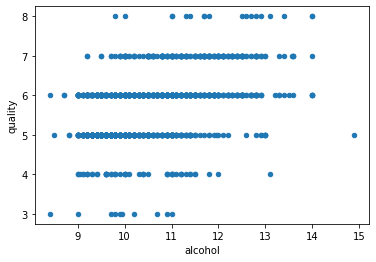

In [17]:
lines = wine.plot.scatter(x='alcohol', y='quality')


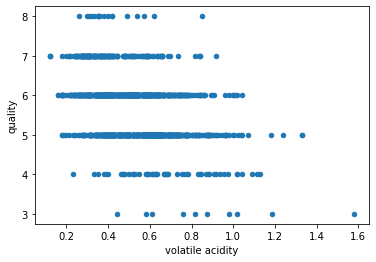

In [22]:
lines = wine.plot.scatter(x='volatile acidity', y='quality')

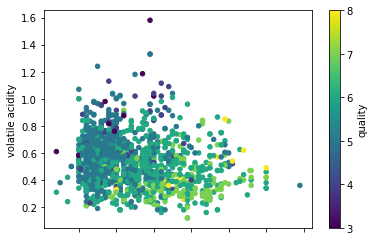

In [21]:
ax2 = wine.plot.scatter(x='alcohol',
                      y='volatile acidity',
                      c='quality',
                      colormap='viridis')


#Based on the below scatter plot:
#Volatile acidity is inversely correlated with quality of wine that is low Volatile acidity almost always results in higher quality wine
#High alcohol sometimes results in higher quality wine but not always the case

In [21]:
#define response variable
y = wine['quality'] 

#define predictor variables
x = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          1.79e-145
Time:                        20:54:00   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

In [25]:
#define response variable
y = wine['quality'] 

#define predictor variables
x = wine[['total sulfur dioxide', 'sulphates', 'alcohol', 'chlorides', 'volatile acidity']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     172.7
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          5.48e-147
Time:                        19:15:50   Log-Likelihood:                -1580.4
No. Observations:                1599   AIC:                             3173.
Df Residuals:                    1593   BIC:                             3205.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.0049 

In [22]:
#Numpy deals with large arrays and linear algebra
import numpy as np
# Library for data manipulation and analysis
import pandas as pd 
 
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score
 
#Importing the Decision Tree from scikit-learn library
from sklearn.tree import DecisionTreeClassifier
 
# For splitting of data into train and test set
from sklearn.model_selection import train_test_split

In [23]:
train=wine
#setting our dataframe to train

In [26]:
#we split our data into input and output
# y is the output and is stored in "Class" column of dataframe
# X contains the other columns and are features or input
y = train.quality
train.drop(['quality'], axis=1, inplace=True)
X = train
 
# splitting the dataset into train and test part
# the train set is 75% and test set is 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [27]:
# Training the model
# Using the function imported above and applying fit() on it
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
# Using predict() on the model to predict the output
pred=DT.predict(X_test)
 
# using accuracy score for classification 
print(accuracy_score(y_test,pred))

0.575
